In [16]:
import pandas as pd
from collections import defaultdict

In [17]:
with open("coin_die_assignments_groundthruth.csv") as file:
    lines = file.read().splitlines()[1:]

In [18]:
lines = [x.split(",") for x in lines]

In [19]:
path = "../Stempelliste_bueschel_Neuses_einfach.xlsx"
df = pd.read_excel(path, engine='openpyxl')

averse = defaultdict(list)
reverse = defaultdict(list)

ID = df["Dédalo ID"]
A = df["Stempeluntergruppe Av"]
R = df["Stempeluntergruppe Rv"]

for id_val, av, rv in zip(ID, A, R):
    averse[av].append(id_val)
    reverse[rv].append(id_val)
    
averse = {str(k): v for k, v in averse.items()}
reverse = {str(k): v for k, v in reverse.items()}
averse = reverse

In [21]:
averse["Av_17"]

In [22]:
lines
hmm_results = defaultdict(list)
for coin in lines:
    hmm_results[coin[1]].append(int(coin[2].split("/")[-1].split("_")[0]))

In [23]:
from collections import defaultdict
from itertools import combinations

# Step 1: Build reverse mapping from Averse
value_to_group = {}
for group, values in averse.items():
    for v in values:
        value_to_group[v] = group

# Step 2: Count co-memberships
match_count = 0
total_pairs = 0

for hmm_group, hmm_values in hmm_results.items():
    # Convert strings to integers
    hmm_values_int = list(map(int, hmm_values))

    # Check all combinations of two values in hmm_results
    for v1, v2 in combinations(hmm_values_int, 2):
        total_pairs += 1
        # Check if both are in ground truth and belong to same Averse group
        if value_to_group.get(v1) == value_to_group.get(v2) and value_to_group.get(v1) is not None:
            match_count += 1

print(f"Matching pairs: {match_count} out of {total_pairs}")


Matching pairs: 136 out of 3287


In [24]:
hmm_results

defaultdict(list,
            {'56': [3889,
              3897,
              3902,
              3904,
              3886,
              3887,
              3888,
              3899,
              3905,
              3901,
              3895,
              3881,
              3894,
              3767,
              3619,
              3857,
              3685,
              3696,
              3798,
              3786,
              3714,
              3644,
              3666,
              3815,
              3835,
              3745,
              3694,
              3795,
              3750,
              3710,
              3796,
              3757,
              3790,
              3837,
              3724,
              3763,
              3810,
              3794,
              3772,
              3718,
              3775,
              3773,
              3690,
              3766,
              3709,
              3660,
              3676,
              3614,
              38

In [25]:
for true_die in averse:
    print(true_die)

Rv_01
Rv_02
Rv_03
nan
Rv_04
Rv_05
Rv_06
Rv_07
Rv_08
Rv_09
Rv_10
Rv_11
Rv_12
Rv_13
Rv_14
Rv_15
Rv_16
Rv_17
Rv_18
Rv_19
Rv_20
Rv_21
Rv_22
Rv_23
Rv_24
Rv_25


In [26]:
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 0: Build reverse map from value to Averse group
value_to_av = {}
for group, values in averse.items():
    for v in values:
        value_to_av[v] = group

# Step 1: Ensure all HMM values are integers
hmm_results_int = {k: list(map(int, v)) for k, v in hmm_results.items()}

# Step 2: Count how many elements from each Averse group appear in each HMM group
hmm_to_av_votes = defaultdict(lambda: defaultdict(int))

for hmm_key, values in hmm_results_int.items():
    for val in values:
        av_group = value_to_av.get(val)
        if av_group:
            hmm_to_av_votes[hmm_key][av_group] += 1

print(hmm_to_av_votes)
# Step 3: Assign each HMM group to the Averse group with the most overlaps
assigned_av_names = {}
used_av_names = set()

for hmm_key in hmm_results_int.keys():
    votes = hmm_to_av_votes.get(hmm_key, {})
    if votes:
        # Sort votes by count (descending), then alphabetically
        sorted_votes = sorted(votes.items(), key=lambda x: (-x[1], x[0]))
        for av_group, _ in sorted_votes:
            if av_group not in used_av_names:
                assigned_av_names[hmm_key] = av_group
                used_av_names.add(av_group)
                break
        else:
            # If all av_groups are used, assign a fallback name
            assigned_av_names[hmm_key] = f"Unmatched_{hmm_key}"
    else:
        # No overlaps at all
        assigned_av_names[hmm_key] = f"Unmatched_{hmm_key}"

# Step 4: Apply renaming safely
renamed_hmm_results = {
    assigned_av_names[k]: v for k, v in hmm_results_int.items()
}

# Step 5: Recompute overlap distribution
av_hmm_distribution_renamed = defaultdict(lambda: defaultdict(int))

for hmm_key, values in renamed_hmm_results.items():
    for val in values:
        av_group = value_to_av.get(val)
        if av_group:
            av_hmm_distribution_renamed[av_group][hmm_key] += 1

# Step 6: Prepare data for plotting
plot_data_renamed = []
for av_group, hmm_map in av_hmm_distribution_renamed.items():
    for hmm_group, count in hmm_map.items():
        plot_data_renamed.append((av_group, hmm_group, count))

df_renamed = pd.DataFrame(plot_data_renamed, columns=['Averse Group', 'HMM Group (Renamed)', 'Count'])



defaultdict(<function <lambda> at 0x7ba8e3ef3920>, {'56': defaultdict(<class 'int'>, {'Rv_22': 5, 'Rv_24': 5, 'Rv_25': 2, 'Rv_23': 2, 'Rv_13': 2, 'Rv_21': 2, 'Rv_06': 3, 'Rv_07': 4, 'Rv_18': 3, 'Rv_16': 2, 'Rv_08': 5, 'Rv_01': 3, 'Rv_03': 1, 'Rv_11': 3, 'Rv_20': 2, 'nan': 4, 'Rv_12': 2, 'Rv_17': 3, 'Rv_09': 1, 'Rv_19': 2, 'Rv_14': 2, 'Rv_15': 2, 'Rv_02': 1, 'Rv_05': 1, 'Rv_10': 1}), '40': defaultdict(<class 'int'>, {'Rv_24': 1, 'Rv_13': 1, 'Rv_02': 1, 'Rv_19': 1, 'Rv_12': 1}), '65': defaultdict(<class 'int'>, {'Rv_24': 1, 'Rv_11': 1, 'Rv_06': 1, 'nan': 1}), '11': defaultdict(<class 'int'>, {'Rv_25': 3, 'Rv_01': 6, 'Rv_22': 2, 'Rv_05': 3, 'Rv_18': 3, 'Rv_14': 2, 'Rv_20': 3, 'Rv_11': 2, 'Rv_02': 2, 'Rv_21': 4, 'Rv_15': 2, 'Rv_07': 2, 'Rv_16': 1, 'Rv_19': 1, 'nan': 1, 'Rv_04': 1, 'Rv_12': 2, 'Rv_10': 1, 'Rv_08': 2, 'Rv_09': 1}), '55': defaultdict(<class 'int'>, {'Rv_25': 1, 'nan': 1, 'Rv_01': 4, 'Rv_05': 2, 'Rv_06': 1, 'Rv_15': 1, 'Rv_03': 1, 'Rv_12': 1, 'Rv_04': 1, 'Rv_09': 1, 'Rv_11': 1

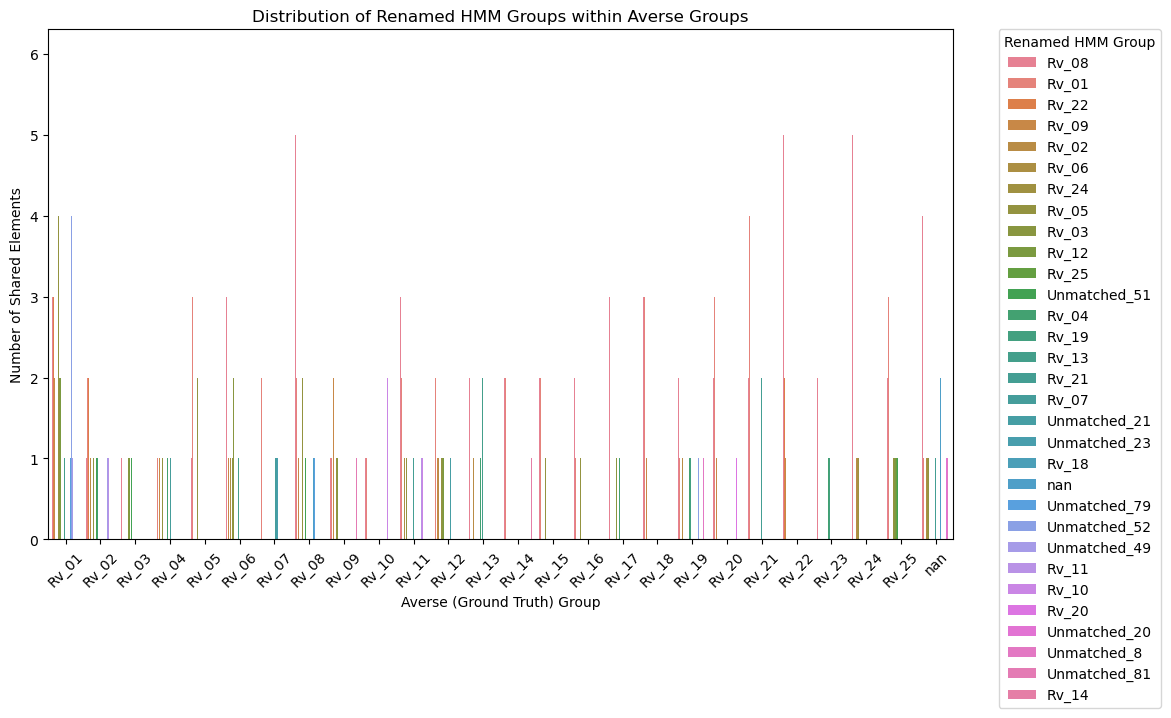

In [28]:
# Step 7: Plotting with alphabetically sorted x-axis
plt.figure(figsize=(14, 7))  # bigger figure (width=14, height=7)

sorted_av_groups = sorted(df_renamed['Averse Group'].unique())

sns.barplot(
    data=df_renamed,
    x='Averse Group',
    y='Count',
    hue='HMM Group (Renamed)',
    order=sorted_av_groups
)

plt.title("Distribution of Renamed HMM Groups within Averse Groups")
plt.xlabel("Averse (Ground Truth) Group")
plt.ylabel("Number of Shared Elements")
plt.xticks(rotation=45)

plt.legend(
    title="Renamed HMM Group",
    bbox_to_anchor=(1.05, 1),  # x=1.05 moves it just outside right
    loc='upper left',
    borderaxespad=0
)

plt.tight_layout(rect=[0, 0, 0.85, 1])  # leave space on right for legend

# Save the figure before showing it
plt.savefig("hmm_distribution_plot_groundthruth_reverse.png", dpi=300, bbox_inches='tight')

plt.show()


In [29]:
print([x for x in plot_data_renamed if x[0] == "Rv_08"])

[('Rv_08', 'Rv_08', 5), ('Rv_08', 'Rv_01', 2), ('Rv_08', 'Rv_05', 2), ('Rv_08', 'Rv_09', 1), ('Rv_08', 'Unmatched_51', 1), ('Rv_08', 'nan', 1), ('Rv_08', 'Unmatched_21', 1), ('Rv_08', 'Unmatched_79', 1)]


In [ ]:
# save plot
